This notebook find clusters of similarities from Manhattan NY and Toronto data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

print('Libraries Imported!')

Libraries Imported!


In [2]:
NY_grouped = pd.read_excel(r'C:\NecessaryFolders\PYTHON_IBM_DATA_SCIENCE\Capstone_Project\Final_Project\submission\NY_grouped.xlsx')
Toronto_grouped = pd.read_excel(r'C:\NecessaryFolders\PYTHON_IBM_DATA_SCIENCE\Capstone_Project\Final_Project\submission\Toronto_grouped.xlsx')

Merge Manhattan NewYork and Toronto data, it will be used to make clusters

In [3]:
list_NY = list(NY_grouped.columns)
list_Toronto = list(Toronto_grouped.columns)
list_NY_Toronto=list(set(list_NY).intersection(list_Toronto))

df=pd.merge(NY_grouped,Toronto_grouped, on=list_NY_Toronto,how='outer')
cols = [col for col in df.columns if col not in list_NY_Toronto]
df=df.drop(cols,axis=1)
df.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Allerton,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.029412,0.029412,0.0,0.000000,0.029412,0.0,0.029412,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000

In [4]:
import matplotlib.pyplot as plt

Apply Principal Component Analysis(PCA) to reduce dimension

Text(0, 0.5, 'cumulative explained variance')

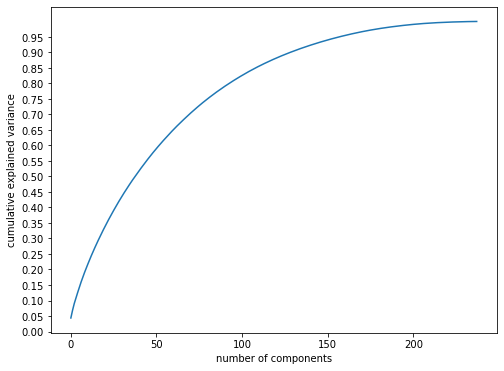

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

neigh_name = df['Neighborhood']
df_grouped_clustering = df.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df_grouped_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [15]:
pca = PCA(n_components=175)
dataset = pca.fit_transform(data_rescaled)
dataset

array([[-0.26642214,  0.04849056,  0.16958208, ..., -0.02610668,
        -0.0678514 , -0.04996331],
       [-0.15924279, -0.09811434, -0.00217397, ...,  0.01790782,
         0.0062112 , -0.01029127],
       [-0.28893793,  0.0539726 ,  0.00891095, ..., -0.03863855,
        -0.00159728,  0.00127571],
       ...,
       [-0.01405884, -0.24238702, -0.15399487, ...,  0.07419142,
        -0.02855498, -0.02125839],
       [-0.2290807 , -0.15191989, -0.07113338, ..., -0.00390714,
        -0.07851769,  0.0389641 ],
       [-0.21739567, -0.16862153, -0.05706814, ..., -0.0560517 ,
         0.01885724, -0.04804722]])

Elbow Method to determine minimum number of clusters

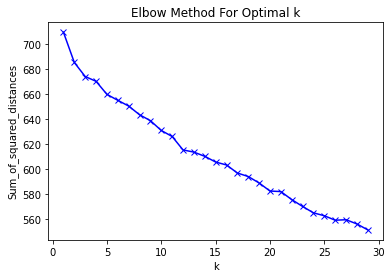

In [16]:
Sum_of_squared_distances = []
K = range(1, 30)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10).fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Silhouette score method to determine the number of clusters

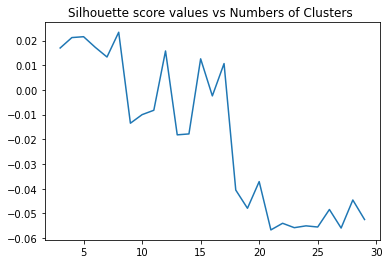

Optimal number of components is:
8


In [17]:
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt
 
obs = dataset.copy() 

silhouette_score_values=list()
 
NumberOfClusters=range(3,30)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)

    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df['Neighborhood']

for ind in np.arange(df.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Spa,Pharmacy,Deli / Bodega,Chinese Restaurant,Supermarket,Cosmetics Shop,Playground,Grocery Store,Department Store
1,Annadale,Pizza Place,American Restaurant,Cosmetics Shop,Restaurant,Diner,Sports Bar,Train Station,Event Space,Falafel Restaurant,Farmers Market
2,Arden Heights,Pizza Place,Coffee Shop,Deli / Bodega,Pharmacy,Discount Store,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
3,Arlington,Intersection,Boat or Ferry,Deli / Bodega,Bus Stop,Yoga Studio,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,Arrochar,Bus Stop,Deli / Bodega,Italian Restaurant,Athletics & Sports,Supermarket,Food Truck,Bagel Shop,Sandwich Place,Hotel,Middle Eastern Restaurant


In [20]:
df_grouped_clustering = dataset.copy()
df_grouped_clustering

array([[-0.26642214,  0.04849056,  0.16958208, ..., -0.02610668,
        -0.0678514 , -0.04996331],
       [-0.15924279, -0.09811434, -0.00217397, ...,  0.01790782,
         0.0062112 , -0.01029127],
       [-0.28893793,  0.0539726 ,  0.00891095, ..., -0.03863855,
        -0.00159728,  0.00127571],
       ...,
       [-0.01405884, -0.24238702, -0.15399487, ...,  0.07419142,
        -0.02855498, -0.02125839],
       [-0.2290807 , -0.15191989, -0.07113338, ..., -0.00390714,
        -0.07851769,  0.0389641 ],
       [-0.21739567, -0.16862153, -0.05706814, ..., -0.0560517 ,
         0.01885724, -0.04804722]])

Performing K-Means

In [21]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2, copy_x=True).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [22]:
df_grouped_with_cluster = df.copy()
df_grouped_with_cluster.insert(0, 'Cluster_Labels', kmeans.labels_)

In [23]:
df_grouped_with_cluster.head()

,Cluster_Labels,Neighborhood,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,4,Allerton,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.029412,0.029412,0.0,0.000000,0.029412,0.0,0.029412,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [24]:
df_with_cluster_and_neighborhood = df_grouped_with_cluster[['Cluster_Labels', 'Neighborhood']]

Appending New York data and Toronto data with respective cluster labels

In [25]:
NY_data = pd.read_excel('NY_data.xlsx')
Toronto_data = pd.read_excel('Toronto_data.xlsx')
print('NY_data shape: ', NY_data.shape)
print('Toronto_data shape: ', Toronto_data.shape)

NY_data shape:  (306, 4)
Toronto_data shape:  (103, 5)


In [26]:
NY_data_merged = NY_data[['Neighborhood', 'Latitude', 'Longitude']]
NY_data_merged = NY_data_merged.merge(df_with_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')

In [27]:
NY_data_merged.dropna(inplace = True)
NY_data_merged.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels
0,Wakefield,40.894705,-73.847201,4.0
1,Co-op City,40.874294,-73.829939,4.0
2,Eastchester,40.887556,-73.827806,0.0
3,Fieldston,40.895437,-73.905643,1.0
4,Riverdale,40.890834,-73.912585,1.0


In [28]:
Toronto_data_merged = Toronto_data[['Neighborhood', 'Latitude', 'Longitude']]
Toronto_data_merged = Toronto_data_merged.merge(df_with_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')

In [29]:
Toronto_data_merged.dropna(inplace = True)
Toronto_data_merged.shape

(50, 4)

Visualizing Manhattan City Clusters with Folium Map

In [30]:
address_NY = 'Manhattan, NY'

geolocator = Nominatim(user_agent="NY_explorer")
location = geolocator.geocode(address_NY)
latitude_NY = location.latitude
longitude_NY = location.longitude
print('The geograpical coordinate of Manhattan, NY are {}, {}.'.format(latitude_NY, longitude_NY))

The geograpical coordinate of Manhattan, NY are 40.7896239, -73.9598939.


In [31]:
# create map
map_NY_with_clusters = folium.Map(location=[latitude_NY, longitude_NY], zoom_start= 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_data_merged['Latitude'], NY_data_merged['Longitude'], NY_data_merged['Neighborhood'], NY_data_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_NY_with_clusters)
       
map_NY_with_clusters

In [32]:
address_can = 'East York, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address_can)
latitude_tor = location.latitude
longitude_tor = location.longitude
print('The geograpical coordinate of East York, Toronto are {}, {}.'.format(latitude_tor, longitude_tor))

The geograpical coordinate of East York, Toronto are 43.699971000000005, -79.33251996261595.


Visualizing Toronto City Clusters with Folium Map

In [33]:
# create map
map_Toronto_with_clusters = folium.Map(location=[latitude_tor, longitude_tor], zoom_start= 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_data_merged['Latitude'], Toronto_data_merged['Longitude'], Toronto_data_merged['Neighborhood'], Toronto_data_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_Toronto_with_clusters)
       
map_Toronto_with_clusters

Cluster 1 Comparison between Toronto and Manhattan, NY

In [47]:
is_Cluster_1 = NY_data_merged['Cluster_Labels'] == 0.0
NY_Cluster_1 = NY_data_merged[ is_Cluster_1]
print(NY_Cluster_1)
print( 'Number of neighborhoods for Cluster 1', NY_Cluster_1.shape)

        Neighborhood   Latitude  Longitude  Cluster_Labels
2        Eastchester  40.887556 -73.827806             0.0
6        Marble Hill  40.876551 -73.910660             0.0
12       City Island  40.847247 -73.786488             0.0
19      High  Bridge  40.836623 -73.926102             0.0
24       Hunts Point  40.809730 -73.883315             0.0
44         Unionport  40.829774 -73.850535             0.0
67          Red Hook  40.676253 -74.012759             0.0
71     Cypress Hills  40.682391 -73.876616             0.0
82   Gerritsen Beach  40.590848 -73.930102             0.0
104   Manhattanville  40.816934 -73.957385             0.0
129          Astoria  40.768509 -73.915654             0.0
165       St. Albans  40.694445 -73.758676             0.0
176         Edgemere  40.595642 -73.776133             0.0
178   Rockaway Beach  40.582802 -73.822361             0.0
191    Rockaway Park  40.580343 -73.841534             0.0
223            Rugby  40.655572 -73.926882             0

In [48]:
is_Cluster_1 = Toronto_data_merged['Cluster_Labels'] == 0.0
Toronto_Cluster_1 = Toronto_data_merged[ is_Cluster_1]
print(Toronto_Cluster_1)
print( 'Number of neighborhoods for Cluster 1', Toronto_Cluster_1.shape)

Empty DataFrame
Columns: [Neighborhood, Latitude, Longitude, Cluster_Labels]
Index: []
Number of neighborhoods for Cluster 1 (0, 4)


In [ ]:
Cluster 2 Comparison between Toronto and Manhattan, NY

In [49]:
is_Cluster_2 = NY_data_merged['Cluster_Labels'] == 1.0
NY_Cluster_2 = NY_data_merged[ is_Cluster_2]
print(NY_Cluster_2)
print( 'Number of neighborhoods for Cluster 2', NY_Cluster_2.shape)

          Neighborhood   Latitude  Longitude  Cluster_Labels
3            Fieldston  40.895437 -73.905643             1.0
4            Riverdale  40.890834 -73.912585             1.0
7             Woodlawn  40.898273 -73.867315             1.0
8              Norwood  40.877224 -73.879391             1.0
9       Williamsbridge  40.881039 -73.857446             1.0
10          Baychester  40.866858 -73.835798             1.0
17        East Tremont  40.842696 -73.887356             1.0
21          Mott Haven  40.806239 -73.916100             1.0
22         Port Morris  40.801664 -73.913221             1.0
27        Clason Point  40.806551 -73.854144             1.0
28         Throgs Neck  40.815109 -73.816350             1.0
29        Country Club  40.844246 -73.824099             1.0
33         Morris Park  40.847549 -73.850402             1.0
35      Spuyten Duyvil  40.881395 -73.917190             1.0
40         Castle Hill  40.819014 -73.848027             1.0
50           Gravesend  

In [50]:
is_Cluster_2 = Toronto_data_merged['Cluster_Labels'] == 1.0
Toronto_Cluster_2 = Toronto_data_merged[ is_Cluster_2]
print(Toronto_Cluster_2)
print( 'Number of neighborhoods for Cluster 2', Toronto_Cluster_2.shape)

                                      Neighborhood   Latitude  Longitude  \
0                                        Parkwoods  43.753259 -79.329656   
1                                 Victoria Village  43.725882 -79.315572   
10                                       Glencairn  43.709577 -79.445073   
14                                Woodbine Heights  43.695344 -79.318389   
16                              Humewood-Cedarvale  43.693781 -79.428191   
18               Guildwood, Morningside, West Hill  43.763573 -79.188711   
19                                     The Beaches  43.676357 -79.293031   
21                             Caledonia-Fairbanks  43.689026 -79.453512   
22                                          Woburn  43.770992 -79.216917   
23                                         Leaside  43.709060 -79.363452   
25                                        Christie  43.669542 -79.422564   
26                                       Cedarbrae  43.773136 -79.239476   
27          

In [ ]:
Cluster 3 Comparison between Toronto and Manhattan, NY

In [51]:
is_Cluster_3 = NY_data_merged['Cluster_Labels'] == 2.0
NY_Cluster_3 = NY_data_merged[ is_Cluster_3]
print(NY_Cluster_3)
print( 'Number of neighborhoods for Cluster 3', NY_Cluster_3.shape)

            Neighborhood   Latitude  Longitude  Cluster_Labels
49            Greenpoint  40.730201 -73.954241             2.0
58       Windsor Terrace  40.656946 -73.980073             2.0
59      Prospect Heights  40.676822 -73.964859             2.0
62              Bushwick  40.698116 -73.925258             2.0
63    Bedford Stuyvesant  40.687232 -73.941785             2.0
64      Brooklyn Heights  40.695864 -73.993782             2.0
65           Cobble Hill  40.687920 -73.998561             2.0
66       Carroll Gardens  40.680540 -73.994654             2.0
69           Fort Greene  40.688527 -73.972906             2.0
70            Park Slope  40.672321 -73.977050             2.0
84          Clinton Hill  40.693229 -73.967843             2.0
86              Downtown  40.690844 -73.983463             2.0
87           Boerum Hill  40.685683 -73.983748             2.0
95     East Williamsburg  40.708492 -73.938858             2.0
96            North Side  40.714823 -73.958809         

In [52]:
is_Cluster_3 = Toronto_data_merged['Cluster_Labels'] == 2.0
Toronto_Cluster_3 = Toronto_data_merged[ is_Cluster_3]
print(Toronto_Cluster_3)
print( 'Number of neighborhoods for Cluster 3', Toronto_Cluster_3.shape)

                               Neighborhood   Latitude  Longitude  \
24                       Central Bay Street  43.657952 -79.387383   
37                 Little Portugal, Trinity  43.647927 -79.419750   
48           Commerce Court, Victoria Hotel  43.648198 -79.379817   
54                          Studio District  43.659526 -79.340923   
69            High Park, The Junction South  43.661608 -79.464763   
81                       Runnymede, Swansea  43.651571 -79.484450   
97   First Canadian Place, Underground city  43.648429 -79.382280   
99                     Church and Wellesley  43.665860 -79.383160   

    Cluster_Labels  
24             2.0  
37             2.0  
48             2.0  
54             2.0  
69             2.0  
81             2.0  
97             2.0  
99             2.0  
Number of neighborhoods for Cluster 2 (8, 4)


In [ ]:
Cluster 4 Comparison between Toronto and Manhattan, NY

In [53]:
is_Cluster_4 = NY_data_merged['Cluster_Labels'] == 3.0
NY_Cluster_4 = NY_data_merged[ is_Cluster_4]
print(NY_Cluster_4)
print( 'Number of neighborhoods for Cluster 4', NY_Cluster_4.shape)

Empty DataFrame
Columns: [Neighborhood, Latitude, Longitude, Cluster_Labels]
Index: []
Number of neighborhoods for Cluster 4 (0, 4)


In [54]:
is_Cluster_4 = Toronto_data_merged['Cluster_Labels'] == 3.0
Toronto_Cluster_4 = Toronto_data_merged[ is_Cluster_4]
print(Toronto_Cluster_4)
print( 'Number of neighborhoods for Cluster 4', Toronto_Cluster_4.shape)

       Neighborhood   Latitude  Longitude  Cluster_Labels
15   St. James Town  43.651494 -79.375418             3.0
20      Berczy Park  43.644771 -79.373306             3.0
Number of neighborhoods for Cluster 4 (2, 4)


In [ ]:
Cluster 5 Comparison between Toronto and Manhattan, NY

In [56]:
is_Cluster_5 = NY_data_merged['Cluster_Labels'] == 4.0
NY_Cluster_5 = NY_data_merged[ is_Cluster_5]
print(NY_Cluster_5)
print( 'Number of neighborhoods for Cluster 5', NY_Cluster_5.shape)

                  Neighborhood   Latitude  Longitude  Cluster_Labels
0                    Wakefield  40.894705 -73.847201             4.0
1                   Co-op City  40.874294 -73.829939             4.0
5                  Kingsbridge  40.881687 -73.902818             4.0
11              Pelham Parkway  40.857413 -73.854756             4.0
13                Bedford Park  40.870185 -73.885512             4.0
14          University Heights  40.855727 -73.910416             4.0
15              Morris Heights  40.847898 -73.919672             4.0
16                     Fordham  40.860997 -73.896427             4.0
18                  West Farms  40.839475 -73.877745             4.0
20                     Melrose  40.819754 -73.909422             4.0
23                    Longwood  40.815099 -73.895788             4.0
25                  Morrisania  40.823592 -73.901506             4.0
26                   Soundview  40.821012 -73.865746             4.0
30                 Parkchester  40

In [57]:
is_Cluster_5 = Toronto_data_merged['Cluster_Labels'] == 4.0
Toronto_Cluster_5 = Toronto_data_merged[ is_Cluster_5]
print(Toronto_Cluster_5)
print( 'Number of neighborhoods for Cluster 5', Toronto_Cluster_5.shape)

                            Neighborhood   Latitude  Longitude  Cluster_Labels
39                       Bayview Village  43.786947 -79.385975             4.0
41          The Danforth West, Riverdale  43.679557 -79.352188             4.0
70                             Westmount  43.696319 -79.532242             4.0
74   The Annex, North Midtown, Yorkville  43.672710 -79.405678             4.0
Number of neighborhoods for Cluster 5 (4, 4)
